In [ ]:
!pip install yfinance
import pandas_datareader as web
from pandas_datareader import data as pdr
import yfinance as yfin
import pandas as pd
yfin.pdr_override()


In [ ]:
BTC = pdr.get_data_yahoo("BTC-USD", start="2014-01-01", end="2021-10-31")
ETH = pdr.get_data_yahoo("ETH-USD", start="2014-01-01", end="2021-10-31")
DOGE = pdr.get_data_yahoo("DOGE-USD", start="2014-01-01", end="2021-10-31")
SP5 = pdr.get_data_yahoo("^GSPC", start="2014-01-01", end="2021-10-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
BTC.reset_index(level=0, inplace=True)
ETH.reset_index(level=0, inplace=True)
DOGE.reset_index(level=0, inplace=True)
SP5.reset_index(level=0, inplace=True)

In [ ]:
print(BTC.head(1))
print(ETH.head(1))
print(DOGE.head(1))
print(SP5.head(1))

        Date        Open        High  ...       Close   Adj Close    Volume
0 2014-09-17  465.864014  468.174011  ...  457.334015  457.334015  21056800

[1 rows x 7 columns]
        Date     Open     High      Low    Close  Adj Close  Volume
0 2015-08-07  2.83162  3.53661  2.52112  2.77212    2.77212  164329
        Date      Open      High      Low     Close  Adj Close   Volume
0 2014-09-17  0.000293  0.000299  0.00026  0.000268   0.000268  1463600
        Date         Open         High  ...       Close   Adj Close      Volume
0 2014-01-02  1845.859985  1845.859985  ...  1831.97998  1831.97998  3080600000

[1 rows x 7 columns]


In [ ]:
Merged = SP5.merge(ETH, how = 'outer', on = "Date")
Merged = Merged.merge(DOGE, how = 'outer', on = "Date")
Merged = Merged.merge(BTC, how = 'outer', on = "Date")


In [ ]:
Merged.head(10)

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3.080600e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2.774270e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3.294850e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3.511750e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3.652140e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-01-09,1839.000000,1843.229980,1830.380005,1838.130005,1838.130005,3.581150e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-01-10,1840.060059,1843.150024,1832.430054,1842.369995,1842.369995,3.335710e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-01-13,1841.260010,1843.449951,1815.520020,1819.199951,1819.199951,3.591350e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-01-14,1821.359985,1839.260010,1821.359985,1838.880005,1838.880005,3.353270e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014-01-15,1840.520020,1850.839966,1840.520020,1848.380005,1848.380005,3.777800e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
SP5.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1.972000e+03
mean,2667.990309,2680.976512,2653.910249,2668.500151,2668.500151,3.791833e+09
std,696.244198,699.639608,693.241960,696.790408,696.790408,9.629229e+08
min,1743.819946,1755.790039,1737.920044,1741.890015,1741.890015,1.296540e+09
25%,2083.767517,2093.772522,2075.567566,2083.947571,2083.947571,3.221038e+09
50%,2564.695068,2576.864990,2548.130005,2561.680054,2561.680054,3.578955e+09
75%,2975.230042,2987.840027,2961.185059,2976.642578,2976.642578,4.096895e+09
max,4580.220215,4608.080078,4569.169922,4605.379883,4605.379883,9.878040e+09


In [ ]:
Merged.columns = ["Date","Open_SP5",	'High_SP5'	,'Low_SP5',	'Close_SP5',	'Adj_Close_SP5','Volume_SP5',"Open_ETH",	'High_ETH'	,'Low_ETH',	'Close_ETH',	'Adj_Close_ETH','Volume_ETH',"Open_DOGE",	'High_DOGE'	,'Low_DOGE',	'Close_DOGE',	'Adj_Close_DOGE','Volume_BTC',"Open_BTC",	'High_BTC'	,'Low_BTC',	'Close_BTC',	'Adj_Close_BTC','Volume_BTC']

In [ ]:
Merged.head(10)

,Date,Open_SP5,High_SP5,Low_SP5,Close_SP5,Adj_Close_SP5,Volume_SP5,Open_ETH,High_ETH,Low_ETH,Close_ETH,Adj_Close_ETH,Volume_ETH,Open_DOGE,High_DOGE,Low_DOGE,Close_DOGE,Adj_Close_DOGE,Volume_BTC,Open_BTC,High_BTC,Low_BTC,Close_BTC,Adj_Close_BTC,Volume_BTC
0,2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3.080600e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2.774270e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3.294850e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3.511750e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3.652140e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-01-09,1839.000000,1843.229980,1830.380005,1838.130005,1838.130005,3.581150e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-01-10,1840.060059,1843.150024,1832.430054,1842.369995,1842.369995,3.335710e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-01-13,1841.260010,1843.449951,1815.520020,1819.199951,1819.199951,3.591350e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-01-14,1821.359985,1839.260010,1821.359985,1838.880005,1838.880005,3.353270e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014-01-15,1840.520020,1850.839966,1840.520020,1848.380005,1848.380005,3.777800e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Testing Append Merge 

BTC2=BTC.copy()
ETH2=ETH.copy()
DOGE2=DOGE.copy()
SP52=SP5.copy()

BTC2['asset']='BTC'
ETH2['asset']='ETH'
DOGE2['asset']='DOGE'
SP52['asset']='SP5'


In [ ]:
Merged2 = SP52.append(ETH2, ignore_index=True)
Merged2 = Merged2.append(DOGE2, ignore_index=True)
Merged2=Merged2.append(BTC2, ignore_index=True)


Merged2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,asset
0,2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000,SP5
1,2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000,SP5
2,2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000,SP5
3,2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000,SP5
4,2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000,SP5


In [ ]:
Merged2['delta']=(Merged2['Close']-Merged2['Open'])/Merged2['Open']

Merged2

,Date,Open,High,Low,Close,Adj Close,Volume,asset,delta
0,2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000,SP5,-0.007520
1,2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000,SP5,-0.001004
2,2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000,SP5,-0.003024
3,2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000,SP5,0.005014
4,2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000,SP5,-0.000223
...,...,...,...,...,...,...,...,...,...
9437,2021-10-27,60352.000000,61435.183594,58208.187500,58482.386719,58482.386719,43657076893,BTC,-0.030978
9438,2021-10-28,58470.730469,62128.632812,58206.917969,60622.136719,60622.136719,45257083247,BTC,0.036795
9439,2021-10-29,60624.871094,62927.609375,60329.964844,62227.964844,62227.964844,36856881767,BTC,0.026443
9440,2021-10-30,62239.363281,62330.144531,60918.386719,61888.832031,61888.832031,32157938616,BTC,-0.005632


In [ ]:
piv_m2= Merged2.pivot(index='Date', columns='asset',values='delta')
piv_m2

asset,BTC,DOGE,ETH,SP5
Date,,,,
2014-01-02,NaN,NaN,NaN,-0.007520
2014-01-03,NaN,NaN,NaN,-0.001004
2014-01-06,NaN,NaN,NaN,-0.003024
2014-01-07,NaN,NaN,NaN,0.005014
2014-01-08,NaN,NaN,NaN,-0.000223
...,...,...,...,...
2021-10-27,-0.030978,-0.070928,-0.048864,-0.006231
2021-10-28,0.036795,0.265674,0.092362,0.007359
2021-10-29,0.026443,-0.040375,0.029394,0.007109


In [ ]:
piv_m2.corr()

asset,BTC,DOGE,ETH,SP5
asset,,,,
BTC,1.000000,0.438578,0.517595,0.130584
DOGE,0.438578,1.000000,0.324943,0.101105
ETH,0.517595,0.324943,1.000000,0.137655
SP5,0.130584,0.101105,0.137655,1.000000


In [ ]:
#Making a data frame of the closing price for utilizing percent change of the dataframe. c1 is for change dataframe. 

Merged.columns

c1_col=['Date','Adj_Close_SP5','Adj_Close_ETH','Adj_Close_DOGE','Adj_Close_BTC']

c1=Merged[c1_col]


c1['Date']=pd.to_datetime(c1.Date)





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#printing c1 to see if it is converting to date. 

c1.sort_values('Date')

,Date,Adj_Close_SP5,Adj_Close_ETH,Adj_Close_DOGE,Adj_Close_BTC
0,2014-01-02,1831.979980,NaN,NaN,NaN
1,2014-01-03,1831.369995,NaN,NaN,NaN
2,2014-01-06,1826.770020,NaN,NaN,NaN
3,2014-01-07,1837.880005,NaN,NaN,NaN
4,2014-01-08,1837.489990,NaN,NaN,NaN
...,...,...,...,...,...
1969,2021-10-27,4551.680176,3930.257324,0.237690,58482.386719
1970,2021-10-28,4596.419922,4287.318848,0.300447,60622.136719
1971,2021-10-29,4605.379883,4414.746582,0.287853,62227.964844
2678,2021-10-30,NaN,4325.650391,0.268345,61888.832031


In [ ]:
#Setting the index to date. 

c1 = c1.set_index(Merged['Date'])
c1

,Adj_Close_SP5,Adj_Close_ETH,Adj_Close_DOGE,Adj_Close_BTC
Date,,,,
2014-01-02,1831.979980,NaN,NaN,NaN
2014-01-03,1831.369995,NaN,NaN,NaN
2014-01-06,1826.770020,NaN,NaN,NaN
2014-01-07,1837.880005,NaN,NaN,NaN
2014-01-08,1837.489990,NaN,NaN,NaN
...,...,...,...,...
2015-07-19,NaN,NaN,0.000169,273.614014
2015-07-25,NaN,NaN,0.000188,288.696991
2015-07-26,NaN,NaN,0.000187,292.686005


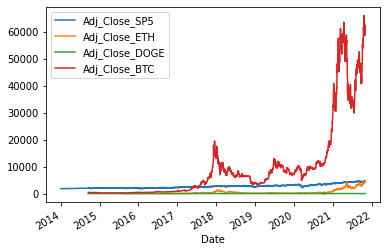

In [ ]:
c1.plot()

In [ ]:
#made new percent change df to limit constant recalculation. 

pc1= c1.pct_change()




In [ ]:
pc1=pc1*100

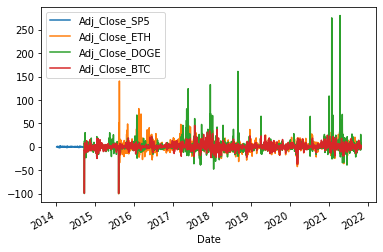

In [ ]:
pc1.plot()

In [ ]:
#calculating correlation of the percent change columns.
pc1.corr()

,Adj_Close_SP5,Adj_Close_ETH,Adj_Close_DOGE,Adj_Close_BTC
Adj_Close_SP5,1.000000,0.077978,0.033758,0.086222
Adj_Close_ETH,0.077978,1.000000,0.323711,0.476970
Adj_Close_DOGE,0.033758,0.323711,1.000000,0.425017
Adj_Close_BTC,0.086222,0.476970,0.425017,1.000000


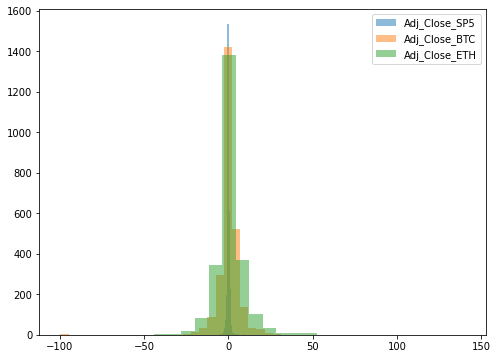

In [ ]:
#Creating multiple histograms. Can see from the plots below that eth and BTC 
#have significantly more volatility. 
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
plt.hist(pc1['Adj_Close_SP5'], bins=30, alpha=.5, label='Adj_Close_SP5');
plt.hist(pc1['Adj_Close_BTC'], bins=30, alpha=.5, label='Adj_Close_BTC');
plt.hist(pc1['Adj_Close_ETH'], bins=30, alpha=.5, label='Adj_Close_ETH');
plt.legend()

#plt.hist(pc1['Adj Close_DOGE'], bins=30, alpha=.5, label='Adj Close_DOGE');
#took out doge because distorted plot. 
#asking max if a power transformation would be appropriate here. 

In [ ]:
#daily variance is much higher for ETH, BTC DOGE. Approx 6-10 percent. 
pc1.describe()

,Adj_Close_SP5,Adj_Close_ETH,Adj_Close_DOGE,Adj_Close_BTC
count,2779.000000,2377.000000,2601.000000,2601.000000
mean,0.037427,1.046557,1.088283,0.465572
std,0.919528,9.632775,14.302157,6.269139
min,-11.984055,-99.982936,-99.945111,-99.580579
25%,-0.128016,-2.550070,-2.830190,-1.549472
50%,0.000000,0.000000,-0.177769,0.264879
75%,0.298342,3.747278,2.325588,2.513206
max,9.382774,140.619341,280.678933,45.615663


In [ ]:
pc1.shape

(2780, 4)

Section below is in progress to subset the overall data set when the SP500 has a significant negative movement. 

In [ ]:
#Subsetting the SP5 data for when there is a significant drop. This helps evaluation if eth, btc are really 
#counter cyclical. 3 standard deviations away from mean would be considered a very large drop. 

SP_sdev=-3*pc1['Adj_Close_SP5'].std()

pc1[pc1.Adj_Close_SP5 < SP_sdev]

pc2=pc1

pc2['num']=range(0,pc2.shape[0])



In [ ]:
neg_days= pc2.num[pc2.Adj_Close_SP5<SP_sdev]



In [ ]:
def twendays(x):
  l1=list(range(x,x+20))
  return(l1)

neg_days_value =neg_days.apply(twendays)

import itertools

neg_days_index=list(itertools.chain.from_iterable(neg_days_value))

In [ ]:
#Subsetting for when the sp 500 is 3 standard deviations negative. 

pc_s =pc2.iloc[neg_days_index]
pc_s.drop('num',axis=1,)

,Adj_Close_SP5,Adj_Close_ETH,Adj_Close_DOGE,Adj_Close_BTC
Date,,,,
2015-08-21,-3.185097,-4.753162,4.316548,-1.181647
2015-08-24,-3.941369,-11.755267,-11.724137,-9.491379
2015-08-25,-1.352199,-7.397236,0.781245,5.279935
2015-08-26,3.903386,1.735680,3.100776,1.905157
2015-08-27,2.429775,-1.058648,-3.007520,-0.470262
...,...,...,...,...
2020-11-18,-1.156383,-0.182365,-0.919618,0.898815
2020-11-19,0.394644,-1.637935,0.068753,0.073489
2020-11-20,-0.679256,8.081356,2.507724,4.513782


In [ ]:
#Dropping number column for correlation. Correlation is much greater when 
pc_s.drop('num',axis=1,inplace=True)

pc_s.corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Adj_Close_SP5,Adj_Close_ETH,Adj_Close_DOGE,Adj_Close_BTC
Adj_Close_SP5,1.000000,0.542450,0.441887,0.512036
Adj_Close_ETH,0.542450,1.000000,0.755643,0.869514
Adj_Close_DOGE,0.441887,0.755643,1.000000,0.810649
Adj_Close_BTC,0.512036,0.869514,0.810649,1.000000


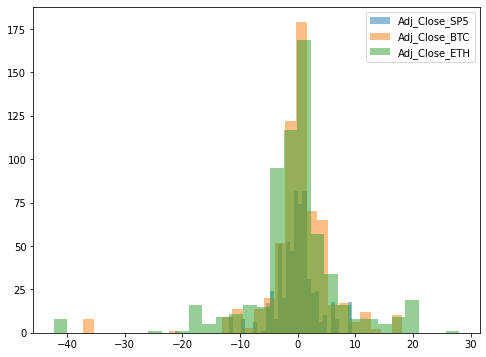

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(pc_s['Adj_Close_SP5'], bins=30, alpha=.5, label='Adj_Close_SP5');
plt.hist(pc_s['Adj_Close_BTC'], bins=30, alpha=.5, label='Adj_Close_BTC');
plt.hist(pc_s['Adj_Close_ETH'], bins=30, alpha=.5, label='Adj_Close_ETH');
plt.legend()

#looks like more negative downside present in the tails of eth and btc distributions. 

General Time series predictions

Rolling Averages over x days

Using days as a hyper parameter and finding how long it takes the markets to react to a large change

Taking recency into account as well, How does correlation look within the last year vs last 5 year

Outside parameters